In [46]:
import albumentations as A
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import flags

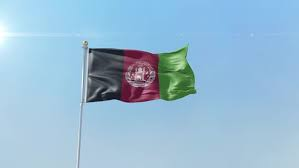

In [65]:
image = Image.open('flags/A29.png')
image

Applying transformations

In [66]:
transform = A.Compose(
    [
        A.VerticalFlip(),
        A.HorizontalFlip(),
        A.Rotate(limit=30),
    ]
)

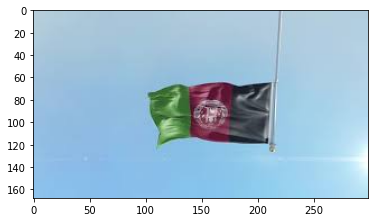

In [67]:
image_list = []
matrix = np.array(image)
for i in range(20):
    augmentations = transform(image=matrix)
    augmented_img = augmentations['image']
    image_list.append(augmented_img)
    plt.imshow(image_list[i])